In [1]:
import nltk
from nltk.corpus import gutenberg
nltk.download('gutenberg')
print(gutenberg.fileids())

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


some statistics for each text

In [2]:
nltk.download('punkt')
for fileid in gutenberg.fileids():
  num_char = len(gutenberg.raw(fileid))
  num_word = len(gutenberg.words(fileid))
  num_sent = len(gutenberg.sents(fileid))
  num_vocab = len(set([w.lower() for w in gutenberg.words(fileid)]))
  print(int(num_char/num_word),int(num_word/num_sent),int(num_word/num_vocab),fileid)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
4 24 26 austen-emma.txt
4 26 16 austen-persuasion.txt
4 28 22 austen-sense.txt
4 33 79 bible-kjv.txt
4 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 17 12 burgess-busterbrown.txt
4 20 12 carroll-alice.txt
4 20 11 chesterton-ball.txt
4 22 11 chesterton-brown.txt
4 18 10 chesterton-thursday.txt
4 20 24 edgeworth-parents.txt
4 25 15 melville-moby_dick.txt
4 52 10 milton-paradise.txt
4 11 8 shakespeare-caesar.txt
4 12 7 shakespeare-hamlet.txt
4 12 6 shakespeare-macbeth.txt
4 36 12 whitman-leaves.txt


In [3]:
from nltk.corpus import brown
nltk.download('brown')
news_text = brown.words(categories='news')
fdist = nltk.FreqDist([w.lower() for w in news_text])
modals = ['can','could','may','might','must','will']
for m in modals:
  print(m + ":",fdist[m])

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
can: 94
could: 87
may: 93
might: 38
must: 53
will: 389


In [4]:
cfd = nltk.ConditionalFreqDist(
    (genre,word) for genre in brown.categories()
    for word in brown.words(categories=genre)
)
genres =['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor'] 
modals = ['can', 'could', 'may', 'might', 'must', 'will'] 
print(cfd.tabulate(condition=genres,samples=modals))

                  can could   may might  must  will 
      adventure    46   151     5    58    27    50 
 belles_lettres   246   213   207   113   170   236 
      editorial   121    56    74    39    53   233 
        fiction    37   166     8    44    55    52 
     government   117    38   153    13   102   244 
        hobbies   268    58   131    22    83   264 
          humor    16    30     8     8     9    13 
        learned   365   159   324   128   202   340 
           lore   170   141   165    49    96   175 
        mystery    42   141    13    57    30    20 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        reviews    45    40    45    26    19    58 
        romance    74   193    11    51    45    43 
science_fiction    16    49     4    12     8    16 
None


In [5]:
# An interesting property of this collection is its time dimension
from nltk.corpus import inaugural
nltk.download('inaugural')
print(inaugural.fileids())

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.
['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1813-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt', '1829-Jackson.txt', '1833-Jackson.txt', '1837-VanBuren.txt', '1841-Harrison.txt', '1845-Polk.txt', '1849-Taylor.txt', '1853-Pierce.txt', '1857-Buchanan.txt', '1861-Lincoln.txt', '1865-Lincoln.txt', '1869-Grant.txt', '1873-Grant.txt', '1877-Hayes.txt', '1881-Garfield.txt', '1885-Cleveland.txt', '1889-Harrison.txt', '1893-Cleveland.txt', '1897-McKinley.txt', '1901-McKinley.txt', '1905-Roosevelt.txt', '1909-Taft.txt', '1913-Wilson.txt', '1917-Wilson.txt', '1921-Harding.txt', '1925-Coolidge.txt', '1929-Hoover.txt', '1933-Roosevelt.txt', '1937-Roosevelt.txt', '1941-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt', '1953-Eisenhower.txt', '1957-Eisenhower.txt', '1961-Kennedy.

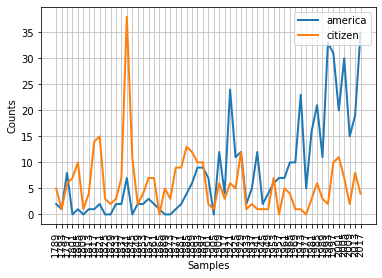

In [6]:
cfd = nltk.ConditionalFreqDist(
    (target,fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['america','citizen']
    if w.lower().startswith(target)
)
cfd.plot()

In [7]:
#my turn example
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
cfd = nltk.ConditionalFreqDist(
    (genre,word) for genre in ['news','romance']
    for word in brown.words(categories=genre)
)
genre = ['news','romance']
print(cfd.tabulate(samples=days))

           Monday   Tuesday Wednesday  Thursday    Friday  Saturday 
   news        54        43        22        20        41        33 
romance         2         3         3         1         3         4 
None


In [8]:
#example on bigrams
nltk.download('genesis')
text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)
print(cfd['living'])
def generate_model(cfdist, word, num=15):
  for i in range(num):
    print(word)
    word = cfdist[word].max()
generate_model(cfd,'living')

[nltk_data] Downloading package genesis to /root/nltk_data...
[nltk_data]   Unzipping corpora/genesis.zip.
<FreqDist with 6 samples and 16 outcomes>
living
creature
that
he
said
,
and
the
land
of
the
land
of
the
land


In [9]:
#simple autocorrect
nltk.download("words")
def unusual_words(text):
  text_vocab = set(w.lower() for w in text if w.isalpha())
  english_vocab = set(w.lower() for w in nltk.corpus.words.words())
  unusual = text_vocab.difference(english_vocab)
  return sorted(unusual)

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [10]:
print(unusual_words(nltk.corpus.gutenberg.words('austen-sense.txt')))

['abbeyland', 'abhorred', 'abilities', 'abounded', 'abridgement', 'abused', 'abuses', 'accents', 'accepting', 'accommodations', 'accompanied', 'accounted', 'accounts', 'accustomary', 'aches', 'acknowledging', 'acknowledgment', 'acknowledgments', 'acquaintances', 'acquiesced', 'acquitted', 'acquitting', 'acted', 'actions', 'adapted', 'adding', 'additions', 'addressed', 'addresses', 'addressing', 'adhering', 'adieus', 'adjusting', 'administering', 'admirers', 'admires', 'admitting', 'adorned', 'advances', 'advantages', 'affairs', 'affections', 'affects', 'affixed', 'afflictions', 'afforded', 'affording', 'ages', 'agitated', 'agonies', 'ailments', 'aimed', 'alarms', 'alienated', 'alighted', 'alleged', 'allenham', 'allowances', 'allowed', 'allowing', 'alluded', 'alterations', 'altered', 'altering', 'amended', 'amounted', 'amusements', 'ankles', 'annamaria', 'annexed', 'announced', 'announcing', 'annuities', 'annum', 'answered', 'answering', 'answers', 'anticipated', 'anticipating', 'antici

In [11]:
#how to filter stopwords from text corpus using lexical corpus of stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

In [0]:
def content_fraction(text):
  stopwords = nltk.corpus.stopwords.words('english')
  content = [w for w in text if w.lower() not in stopwords]
  return len(content) / len(text)

In [13]:
nltk.download('reuters')
content_fraction(nltk.corpus.reuters.words())

[nltk_data] Downloading package reuters to /root/nltk_data...


0.735240435097661

we filtered out almost a third of the words of the text

In [14]:
#example on wordNet, its a synonyms based
from nltk.corpus import wordnet as wn
nltk.download('wordnet')
wn.synsets('motorcar')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


[Synset('car.n.01')]

In [18]:
print(wn.synset('car.n.01').lemma_names())

['car', 'auto', 'automobile', 'machine', 'motorcar']


In [23]:
print(wn.synset('car.n.01').definition())
print(wn.synset('car.n.01').examples())
print(wn.synset('car.n.01').lemmas())

a motor vehicle with four wheels; usually propelled by an internal combustion engine
['he needs a car to get to work']
[Lemma('car.n.01.car'), Lemma('car.n.01.auto'), Lemma('car.n.01.automobile'), Lemma('car.n.01.machine'), Lemma('car.n.01.motorcar')]


In [30]:
types_of_motorcar = wn.synset('car.n.01').hyponyms()
print(types_of_motorcar)
print(sorted([lemma.name() for synset in types_of_motorcar for lemma in synset.lemmas()]))

[Synset('ambulance.n.01'), Synset('beach_wagon.n.01'), Synset('bus.n.04'), Synset('cab.n.03'), Synset('compact.n.03'), Synset('convertible.n.01'), Synset('coupe.n.01'), Synset('cruiser.n.01'), Synset('electric.n.01'), Synset('gas_guzzler.n.01'), Synset('hardtop.n.01'), Synset('hatchback.n.01'), Synset('horseless_carriage.n.01'), Synset('hot_rod.n.01'), Synset('jeep.n.01'), Synset('limousine.n.01'), Synset('loaner.n.02'), Synset('minicar.n.01'), Synset('minivan.n.01'), Synset('model_t.n.01'), Synset('pace_car.n.01'), Synset('racer.n.02'), Synset('roadster.n.01'), Synset('sedan.n.01'), Synset('sport_utility.n.01'), Synset('sports_car.n.01'), Synset('stanley_steamer.n.01'), Synset('stock_car.n.01'), Synset('subcompact.n.01'), Synset('touring_car.n.01'), Synset('used-car.n.01')]
['Model_T', 'S.U.V.', 'SUV', 'Stanley_Steamer', 'ambulance', 'beach_waggon', 'beach_wagon', 'bus', 'cab', 'compact', 'compact_car', 'convertible', 'coupe', 'cruiser', 'electric', 'electric_automobile', 'electric_ca

basicly wordnet has a bunch of methods for linking english language by using words only, in other words we can traverse the WordNet network to find synsets with related meanings. 